# 💳🔍 TASK 2 – Credit Card Fraud Detection #

## 🎯 Problem Definition ##

**Goal:** Build a classification model to identify fraudulent credit card transactions based on historical transaction data.

- **Type:** Binary classification (0 = Genuine, 1 = Fraud)

- **Challenge:** Highly imbalanced dataset

## 📥 Data Collection ##

In [5]:
import pandas as pd
# Load the dataset
data=pd.read_csv(r"C:\Users\Dell\OneDrive\NeuroNexon Innovations\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
print(data['Class'].value_counts()) 
# Check class imbalance

Class
0    284315
1       492
Name: count, dtype: int64


## 🧹Data Preprocessing ##

- Normalize Amount and Time

- Drop irrelevant columns (if any)

- Check for nulls

In [15]:
from sklearn.preprocessing import StandardScaler

# Normalize amount and time
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [17]:
# Check nulls
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 🔍  Exploratory Data Analysis (EDA) ##

- Understand class distribution and feature selection

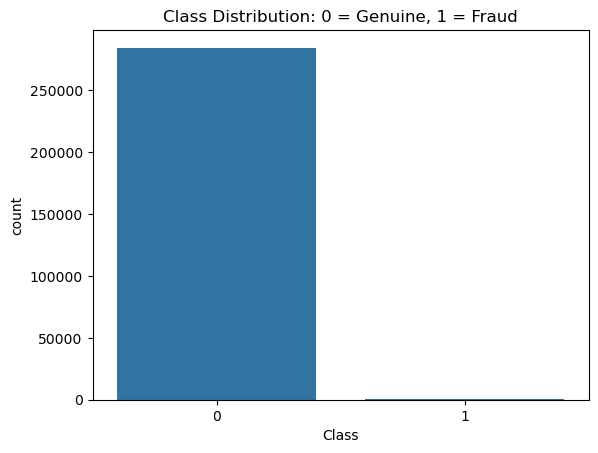

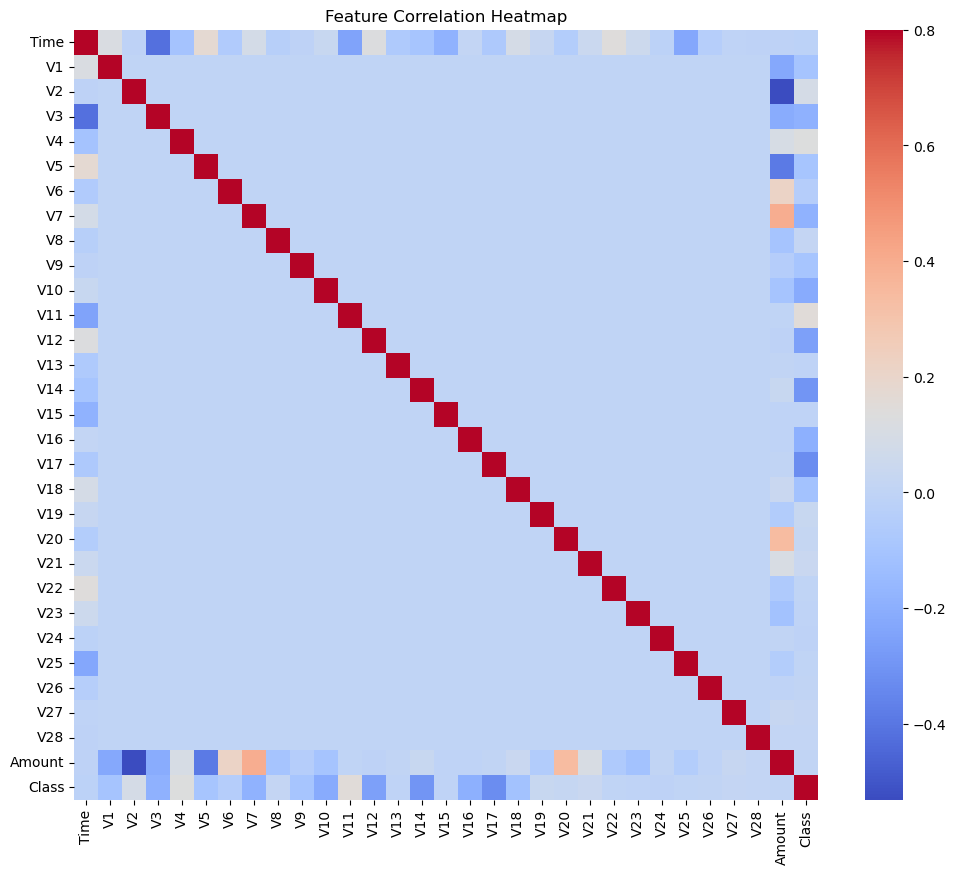

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='Class', data=data)
plt.title("Class Distribution: 0 = Genuine, 1 = Fraud")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=0.8)
plt.title("Feature Correlation Heatmap")
plt.show()


## 📏 Feature Selection and Feature Scaling ##

In [35]:
# Separate features and target
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target

## 🧠 Model Selection and Training ##

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Handle Imbalance**

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Train Model**

In [39]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

## ✅ Assumptions Check ##

**For Logistic Regression:**

- Linear relationship between independent variables and log-odds? 

- Multicollinearity 

- Large dataset

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature        VIF
0     Time   1.879865
1       V1   1.651908
2       V2   4.422390
3       V3   1.877342
4       V4   1.138061
5       V5   2.859316
6       V6   1.571530
7       V7   2.929040
8       V8   1.131633
9       V9   1.023894
10     V10   1.126333
11     V11   1.115328
12     V12   1.030070
13     V13   1.008474
14     V14   1.031854
15     V15   1.063421
16     V16   1.000448
17     V17   1.010701
18     V18   1.031048
19     V19   1.039643
20     V20   2.399180
21     V21   1.140305
22     V22   1.089101
23     V23   1.158142
24     V24   1.000806
25     V25   1.130801
26     V26   1.003359
27     V27   1.010105
28     V28   1.001433
29  Amount  12.116701


## 🧾 Model Evaluation ##

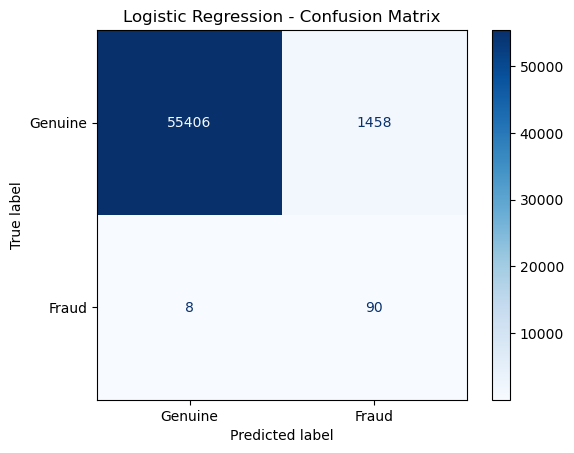

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Genuine", "Fraud"])
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Classification Report
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, digits=4))


## 💾 Save the Model ##

In [55]:
import joblib

# Save trained model
joblib.dump(lr, 'logistic_regression_fraud_model.pkl')

['logistic_regression_fraud_model.pkl']

## ⚖️ Oversampling vs Undersampling for Class Imbalance ##

🔁 Oversampling: Increase minority class examples
✅ Example: SMOTE (Synthetic Minority Oversampling Technique)

✂️ Undersampling: Reduce majority class examples
✅ Example: RandomUnderSampler

In [71]:
from imblearn.under_sampling import RandomUnderSampler

# 1️⃣ SMOTE - Oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_smote, y_smote)
y_pred_smote = lr_smote.predict(X_test)

# 2️⃣ Random Undersampling
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)

lr_under = LogisticRegression(max_iter=1000)
lr_under.fit(X_under, y_under)
y_pred_under = lr_under.predict(X_test)

# 🧾 Evaluation
print("🔁 SMOTE Oversampling Results:")
print(classification_report(y_test, y_pred_smote, digits=4))

print("✂️ Random Undersampling Results:")
print(classification_report(y_test, y_pred_under, digits=4))


🔁 SMOTE Oversampling Results:
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

✂️ Random Undersampling Results:
              precision    recall  f1-score   support

           0     0.9999    0.9604    0.9797     56864
           1     0.0384    0.9184    0.0738        98

    accuracy                         0.9603     56962
   macro avg     0.5191    0.9394    0.5268     56962
weighted avg     0.9982    0.9603    0.9782     56962

